# PCA ON SELECT CLIMATE VARS, OSMIA ONLY
# EUCLID DIST BETWEEN

In [2]:
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import pandas as pd
import rasterio
import matplotlib.pyplot as plt

In [3]:
crta_coords = pd.read_csv('calculate_aoo/df2csv/cornuta_all.csv')
crta_coords = crta_coords[(crta_coords['lat']>0) & (crta_coords['long']>-20)]
print(f'lat_min = {crta_coords['lat'].min()}\nlat_max = {crta_coords['lat'].max()}\nlon_min = {crta_coords['long'].min()}\nlat_max = {crta_coords['long'].max()}\n')

lat_min = 34.9625
lat_max = 59.918117
lon_min = -7.537369
lat_max = 51.08368



In [4]:
bbox = [-8, 35, 52, 60] #minx, miny, maxx, maxy

num_points_side = int(np.sqrt(5000))  
lons = np.linspace(bbox[0], bbox[2], num_points_side)
lats = np.linspace(bbox[1], bbox[3], num_points_side)

grid_points = [Point(lon, lat) for lat in lats for lon in lons]
grid_gdf = gpd.GeoDataFrame(geometry=grid_points)

shapefile_path = 'data/shapefiles/ne_110m_land/ne_110m_land.shp'
gdf = gpd.read_file(shapefile_path)

lakes_shapefile_path = 'data/shapefiles/ne_110m_lakes/ne_110m_lakes.shp'
lakes_gdf = gpd.read_file(lakes_shapefile_path)

land_points = grid_gdf[grid_gdf['geometry'].apply(lambda point:gdf.contains(point).any() and not lakes_gdf.contains(point).any())]
land_coordinates = [(point.y, point.x) for point in land_points['geometry']]

lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='110m')

(-10.99999999999996, 52.9999999999998, 33.99999999999987, 69.03428709808546)

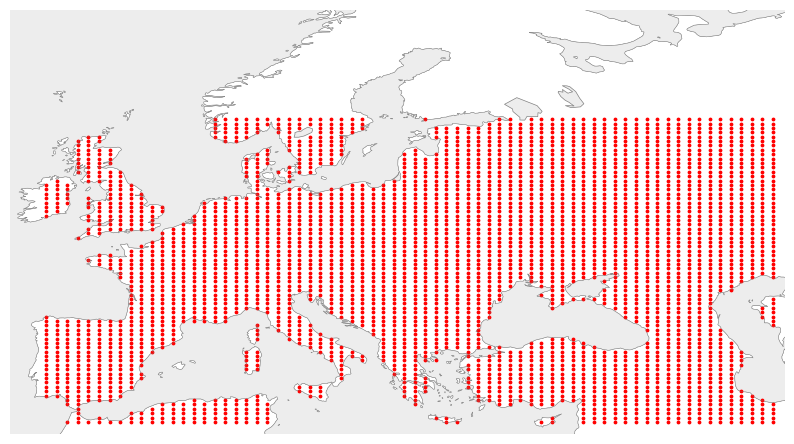

In [5]:

plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax = plt.gca()
ax.set_extent([-11, 53, 34,  66])  # Set the extent (longitude, longitude, latitude, latitude)


ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

#ndvi_tiff_path = '/home/mpgetz/repos/bee_mapping/data/wc2.1_30s_bio/NDVI_hires.tif'
#with rasterio.open(ndvi_tiff_path) as ndvi_src:
#   ndvi_data = ndvi_src.read(1)
#    vmin, vmax = ndvi_data.min(), ndvi_data.max()

#    plt.imshow(ndvi_data, vmin=-1, vmax=1, origin='upper', transform=ccrs.PlateCarree(), cmap='twilight_shifted')

lats, lons = zip(*land_coordinates)
ax.scatter(lons, lats, transform=ccrs.PlateCarree(), marker='o', color='red', s=3)
ax.axis('off')

# cbar = plt.colorbar(label='NDVI', fraction=0.03, pad=0.04)
# cbar.set_label('NDVI') , extent=[-127, -64.5, 34, 55]

In [6]:
europe_df = pd.DataFrame(land_coordinates, columns=['lat', 'lon'])

In [7]:
# import os
# from concurrent.futures import ThreadPoolExecutor


# def get_value_from_array(lat, long, src, array):
#     try:
#         row, col = src.index(long, lat)
#         return array[row, col]
#     except Exception as e:
#         print(f'Error at {lat}, {long}: {e}')
#         return None
    
# ndvi_tiff_path = 'data/tifs/NDVI_Image.tif'
# all_files = [ndvi_tiff_path]

# print(all_files)

# def process_file(file):
#     column_name = 'ndvi'
#     print(f'Processing: {column_name}\n')

#     with rasterio.open(file) as src:
#         array = src.read(1)  
#         europe_df[column_name] = europe_df.apply(lambda row: get_value_from_array(row['lat'], row['lon'], src, array), axis=1)

# with ThreadPoolExecutor(max_workers=1) as executor: 
#     executor.map(process_file, all_files)

# directory = 'data/wc2.1_30s_bio'
# all_files = [f for f in os.listdir(directory) if f.endswith('.tif') and "wc2.1_30s_" in f]

# print(all_files)

# def process_file(file):
#     column_name = file.split("wc2.1_30s_")[1].replace(".tif", "")
#     file_path = os.path.join(directory, file)
#     print(f'Processing: {column_name}\n')

#     with rasterio.open(file_path) as src:
#         array = src.read(1)  
#         europe_df[column_name] = europe_df.apply(lambda row: get_value_from_array(row['lat'], row['lon'], src, array), axis=1)

# with ThreadPoolExecutor(max_workers=4) as executor:  
#     executor.map(process_file, all_files)

# europe_df.to_csv('data/csv/europe_bioclim_ndvi.csv')


In [8]:
europe_df = pd.read_csv('data/csv/europe_bioclim_ndvi.csv')
europe_df.drop(columns=['Unnamed: 0'])

,lat,lon,ndvi,bio_13,bio_11,bio_9,bio_5,elev,bio_6,bio_3,...,bio_2,bio_16,bio_15,bio_1,bio_8,bio_19,bio_14,bio_7,bio_18,bio_4
0,35.0,-6.260870,-0.125140,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38,-32768,-3.400000e+38,-3.400000e+38,...,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38,-3.400000e+38
1,35.0,-5.391304,0.283199,1.490000e+02,1.096667e+01,2.548333e+01,3.360000e+01,328,5.200000e+00,3.984742e+01,...,1.131667e+01,4.140000e+02,8.102385e+01,1.797500e+01,1.096667e+01,4.140000e+02,0.000000e+00,2.840000e+01,1.100000e+01,5.869393e+02
2,35.0,-4.521739,0.163205,1.260000e+02,5.750000e+00,2.031667e+01,2.950000e+01,1343,4.000000e-01,4.083620e+01,...,1.188333e+01,3.630000e+02,7.010957e+01,1.264167e+01,6.750000e+00,3.500000e+02,2.000000e+00,2.910000e+01,2.400000e+01,5.944051e+02
3,35.0,-3.652174,0.131960,8.000000e+01,5.966667e+00,2.040000e+01,2.900000e+01,1270,1.000000e+00,3.946429e+01,...,1.105000e+01,2.100000e+02,5.642151e+01,1.277500e+01,5.966667e+00,2.100000e+02,5.000000e+00,2.800000e+01,3.700000e+01,5.924545e+02
4,35.0,-2.782609,0.130316,5.800000e+01,1.168333e+01,2.335000e+01,3.080000e+01,323,6.300000e+00,4.323129e+01,...,1.059167e+01,1.290000e+02,7.305995e+01,1.734583e+01,1.221667e+01,1.250000e+02,0.000000e+00,2.450000e+01,1.400000e+01,4.868333e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,60.0,48.521739,0.303576,8.100000e+01,-1.166667e+01,-4.116667e+00,2.200000e+01,183,-1.690000e+01,2.137961e+01,...,8.316667e+00,2.250000e+02,3.443332e+01,1.808333e+00,1.505000e+01,1.110000e+02,2.600000e+01,3.890000e+01,2.250000e+02,1.075533e+03
3412,60.0,49.391304,0.321320,7.900000e+01,-1.166667e+01,-4.116667e+00,2.240000e+01,184,-1.630000e+01,2.088717e+01,...,8.083333e+00,2.150000e+02,3.583277e+01,1.958333e+00,1.535000e+01,1.030000e+02,2.500000e+01,3.870000e+01,2.150000e+02,1.087950e+03
3413,60.0,50.260870,0.268473,8.000000e+01,-1.241667e+01,-4.866667e+00,2.260000e+01,184,-1.740000e+01,2.160417e+01,...,8.641666e+00,2.170000e+02,3.527664e+01,1.545834e+00,1.528333e+01,1.010000e+02,2.600000e+01,4.000000e+01,2.170000e+02,1.114048e+03
3414,60.0,51.130435,0.265417,8.100000e+01,-1.278333e+01,-5.116667e+00,2.280000e+01,164,-1.890000e+01,2.250200e+01,...,9.383333e+00,2.180000e+02,3.641564e+01,1.300000e+00,1.523333e+01,1.050000e+02,2.500000e+01,4.170000e+01,2.180000e+02,1.129461e+03


In [10]:
europe = europe_df.copy()
europe_points = europe[['lat', 'lon']]
europe = europe[['bio_1', 'bio_12', 'elev']]
europe['group'] = 'europe'

In [11]:
europe = europe[europe['elev'] > 0]


In [12]:
europe.describe()

,bio_1,bio_12,elev
count,3251.000000,3251.000000,3251.000000
mean,8.620667,661.994156,417.281759
std,4.043764,270.438398,530.565971
min,-9.775000,124.000000,1.000000
25%,5.708334,524.500000,110.000000
50%,8.212500,611.000000,190.000000
75%,10.862500,726.000000,505.000000
max,24.820833,2687.000000,4506.000000


In [13]:
america = pd.read_csv('data/csv/10k_america_bioclim_ndvi.csv', index_col=None)
#america = america.drop(columns='Unnamed: 0')
america = america[america['bio_13']!= -3.4e+38]
america = america[america['elev']> 0]
column_order = europe_df.columns.tolist()
america = america[column_order]
america_points = america[['lat', 'lon']].reset_index(drop=True)
america = america[['bio_1', 'bio_12', 'elev']]
america['group'] = 'america'


In [15]:
america.describe()

,bio_1,bio_12,elev
count,6535.000000,6535.000000,6535.000000
mean,8.379412,745.135425,735.869778
std,6.865420,412.019893,668.523579
min,-5.608333,60.000000,1.000000
25%,2.720833,416.000000,254.000000
50%,7.679167,695.000000,464.000000
75%,13.572916,1009.000000,1120.000000
max,24.941666,4233.000000,3926.000000


In [16]:
america_points 

,lat,lon
0,25.0,-111.727273
1,25.0,-111.050505
2,25.0,-107.666667
3,25.0,-106.989899
4,25.0,-106.313131
...,...,...
6530,54.0,-65.707071
6531,54.0,-65.030303
6532,54.0,-64.353535
6533,54.0,-63.676768


In [17]:
osmia = pd.read_csv('data/csv/bioclim.csv')
osmia = osmia[column_order]
osmia = osmia[osmia['bio_13']!=-3.4e+38]
osmia = osmia[osmia['elev']> 0]
coords = osmia[['lat', 'lon']]
# osmia = osmia.drop(columns=['lat', 'lon'])
# osmia['group'] = 'osmia'


crta_coords_filtered = pd.read_csv('data/csv/crta_coords_filtered.csv')
crta_coords_filtered.columns = ['lat', 'lon']
osmia = pd.merge(osmia, crta_coords_filtered, on=['lat', 'lon'])
osmia = osmia.drop_duplicates(subset=['lat', 'lon'])
osmia = osmia[osmia['bio_13']!=-3.4e+38]
osmia_coords = osmia[['lat', 'lon']]
osmia = osmia[['bio_1', 'bio_12', 'elev']]
osmia['group'] = 'osmia'

In [18]:
osmia.describe()

,bio_1,bio_12,elev
count,6075.000000,6075.000000,6075.000000
mean,10.009688,774.406914,193.477695
std,1.356123,157.878150,219.921097
min,-0.629167,328.000000,1.000000
25%,9.325000,668.000000,46.000000
50%,9.900000,772.000000,129.000000
75%,10.416667,836.000000,260.000000
max,18.087500,1921.000000,2479.000000


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
combined = pd.concat([europe, america, osmia], ignore_index=True)
combined_points = pd.concat([europe_points, america_points, osmia_coords], ignore_index=True)
combined.describe()
combined_vars = combined.drop(columns=['group'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(combined_vars)
combined_scaled = pd.DataFrame(df_scaled, columns=combined_vars.columns)
bio_columns = [col for col in combined_scaled.columns if col.startswith('bio_')]


other_columns = [col for col in combined_scaled.columns if not col.startswith('bio_')]
bio_columns_sorted = sorted(bio_columns, key=lambda x: (x.split('_')[0], int(x.split('_')[1])))
other_columns_sorted = sorted(other_columns)
sorted_columns = bio_columns_sorted + other_columns_sorted
combined_scaled = combined_scaled[sorted_columns]

In [21]:
combined_scaled.describe()

,bio_1,bio_12,elev
count,1.586100e+04,1.586100e+04,1.586100e+04
mean,-1.003478e-16,1.791924e-16,-5.734157e-17
std,1.000032e+00,1.000032e+00,1.000032e+00
min,-3.839491e+00,-2.190444e+00,-8.173655e-01
25%,-4.985776e-01,-5.975239e-01,-6.368399e-01
50%,1.012915e-01,-5.580226e-02,-3.855198e-01
75%,3.570432e-01,4.117551e-01,1.595969e-01
max,3.239983e+00,1.126554e+01,7.155851e+00


In [22]:
no_osmia_ind = combined[combined['group'] != 'osmia'].index
combined_filtered = combined_scaled.loc[no_osmia_ind]
combined_clipped = combined.loc[no_osmia_ind]



yes_osmia_ind = combined[combined['group'] == 'osmia'].index
osmia_scaled = combined_scaled.loc[yes_osmia_ind]

In [23]:
america_index = combined[combined['group'] == 'america'].index
america_df = combined_scaled.loc[america_index]

In [24]:
osmia_scaled

,bio_1,bio_12,elev
9786,0.128481,-0.246050,-0.466933
9787,0.194755,-0.304091,-0.612062
9788,0.069004,-0.397603,-0.679316
9789,0.206651,-0.352459,-0.631530
9790,0.143775,-0.139640,-0.617371
...,...,...,...
15856,0.199004,-0.565279,-0.465164
15857,0.261030,-0.449195,-0.647459
15858,0.333252,-0.371807,-0.656308
15859,0.152272,-0.429848,-0.541267


Explained Variance Ratio: [0.62919447 0.23908169]
Total explained variance: 0.8682761528620137


Text(0.5, 1.0, 'PCA Loadings Heatmap')

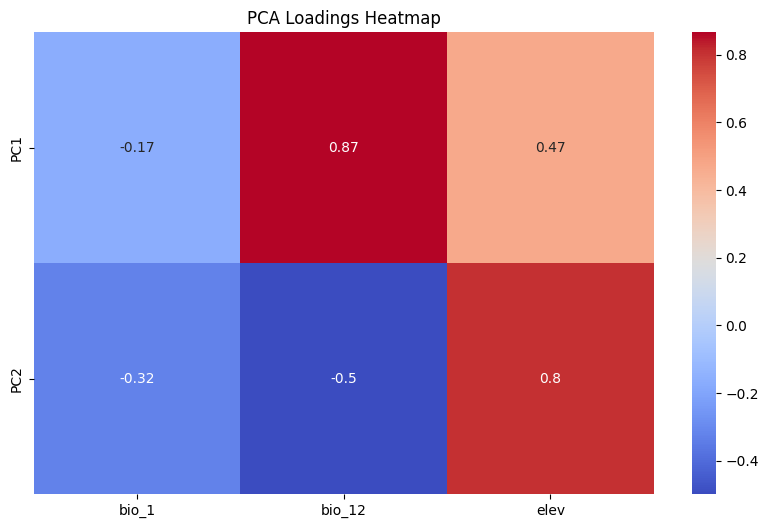

In [26]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2) 
pca_result = pca.fit_transform(osmia_scaled) 
loadings = pca.components_
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", pca.explained_variance_ratio_.sum())
loadings_df = pd.DataFrame(loadings, columns=combined_scaled.columns, index=[f'PC{i+1}' for i in range(loadings.shape[0])])
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('PCA Loadings Heatmap')

In [27]:
n_components = pca_result.shape[1]

for i in range(n_components):
    osmia_scaled[f'PC{i+1}'] = pca_result[:, i]


In [28]:
america_pca = pca.transform(america_df)
for i in range(n_components):
    america_df[f'PC{i+1}'] = america_pca[:, i]

In [29]:
america_df

,bio_1,bio_12,elev,PC1,PC2
3251,2.639264,-1.945379,-0.750111,-2.322355,0.014830
3252,2.785408,-1.561660,-0.128890,-1.722366,0.275515
3253,3.239983,-0.287969,-0.755420,-0.989306,-1.010674
3254,3.155016,0.608452,-0.181986,0.071284,-0.969209
3255,1.147239,1.753161,3.132961,2.958021,1.775434
...,...,...,...,...,...
9781,-2.786747,0.208610,0.074644,0.841907,1.361854
9782,-2.765505,0.224732,0.005619,0.819875,1.291441
9783,-2.745962,0.402082,0.065794,0.998569,1.245037
9784,-2.756158,0.447225,0.005619,1.011117,1.177451


In [30]:
# combined_filtered['group'] = combined_clipped['group']
america_df['group'] = 'america'
osmia_scaled['group'] = 'osmia'

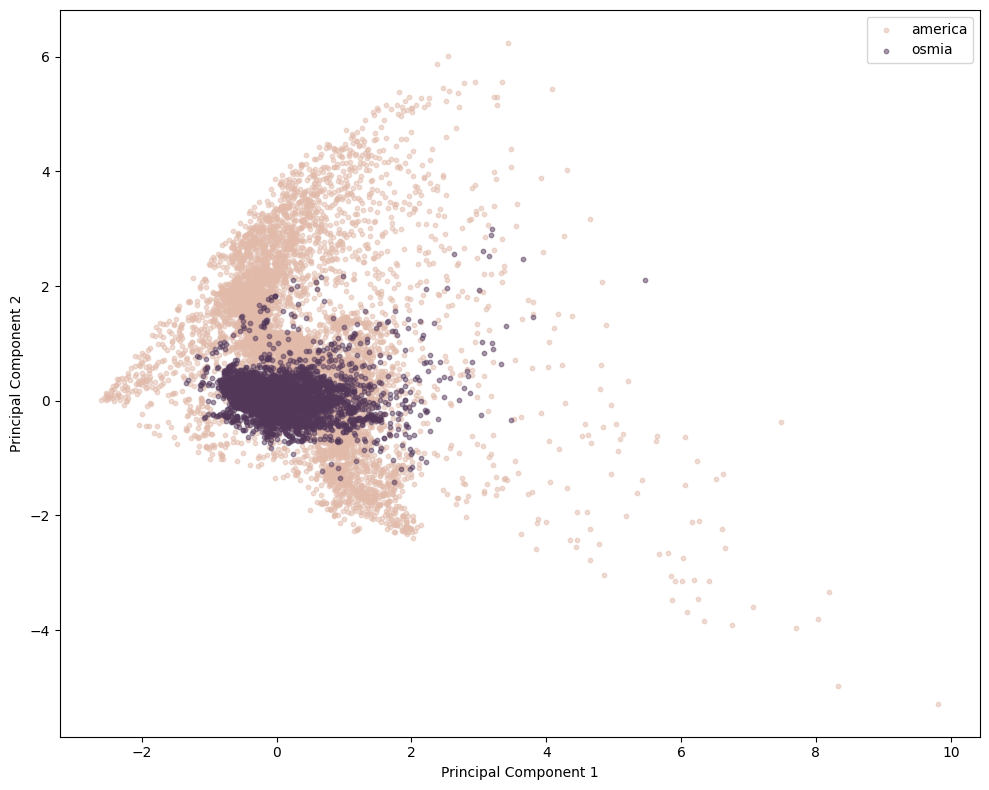

In [31]:
colors = ['#E1BAAA', '#523759', '#00B6BE','#E73F88']

plt.figure(figsize=(10, 8))

# unique_labels = combined['group'].unique()  
# for i, label in enumerate(unique_labels):
#     subset = combined_filtered[combined_filtered['group'] == label]  
#     plt.scatter(subset['PC1'], subset['PC2'], c=colors[i], label=label, s=10, marker= 'o', alpha=0.5)

plt.scatter(america_df['PC1'], america_df['PC2'], c='#E1BAAA', label='america', s=10, marker= 'o', alpha=0.5)
plt.scatter(osmia_scaled['PC1'], osmia_scaled['PC2'], c='#523759', label='osmia', s=10, marker= 'o', alpha=0.5)
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()

In [32]:
# osmia_scaled.reset_index(inplace=True)
# osmia_scaled[osmia_scaled['PC1']<-6]

In [33]:
# osmia_coords.iloc[3666]

In [34]:
# osmia_coords.iloc[3666]['lat']
# plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
# ax = plt.gca()
# ax.set_extent([-11, 53, 34,  66]) 

# ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='gray', linewidth=.5)
# ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
# ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
# ax.add_feature(lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

# ax.scatter(osmia_coords.iloc[3666]['lon'], osmia_coords.iloc[3666]['lat'], transform=ccrs.PlateCarree(), marker='o', color='red', s=3)
# ax.axis('off')

In [35]:
osmia_pca_df = osmia_scaled.iloc[:, -6:-1].reset_index(drop=True)
# america_pca_df = combined_filtered[combined_filtered['group'] == 'america']
america_pca_df = america_df.iloc[:, -6:-1].reset_index(drop=True)
# europe_pca_df = combined_filtered[combined_filtered['group'] == 'europe']
# europe_pca_df = europe_pca_df.iloc[:, -6:-1].reset_index(drop=True)


In [36]:
america_pca_df

,bio_1,bio_12,elev,PC1,PC2
0,2.639264,-1.945379,-0.750111,-2.322355,0.014830
1,2.785408,-1.561660,-0.128890,-1.722366,0.275515
2,3.239983,-0.287969,-0.755420,-0.989306,-1.010674
3,3.155016,0.608452,-0.181986,0.071284,-0.969209
4,1.147239,1.753161,3.132961,2.958021,1.775434
...,...,...,...,...,...
6530,-2.786747,0.208610,0.074644,0.841907,1.361854
6531,-2.765505,0.224732,0.005619,0.819875,1.291441
6532,-2.745962,0.402082,0.065794,0.998569,1.245037
6533,-2.756158,0.447225,0.005619,1.011117,1.177451


In [37]:
# shortest_distances_only = []

# for _, america_point in america_pca_df.iterrows():
#     distances = [np.linalg.norm(america_point - osmia_point) for _, osmia_point in osmia_pca_df.iterrows()]
#     shortest_distance = min(distances)
#     shortest_distances_only.append(shortest_distance)

In [38]:
from concurrent.futures import ProcessPoolExecutor

def min_distance_to_osmia_points(america_point):
    distances = [np.linalg.norm(america_point - osmia_point) for osmia_point in osmia_pca_df.to_numpy()]
    return min(distances)

america_pca_arr = america_pca_df.to_numpy()

with ProcessPoolExecutor() as executor:
    shortest_distances_only = list(executor.map(min_distance_to_osmia_points, america_pca_arr))


In [40]:
import heapq

osmia_pca_arr = osmia_pca_df.to_numpy()

def second_smallest_distance_to_osmia_points(america_point):
    distances = [np.linalg.norm(america_point - osmia_point) for osmia_point in osmia_pca_df.to_numpy()]
    # Use heapq.nsmallest to get the two smallest distances and return the second one
    two_smallest_distances = heapq.nsmallest(2, distances)
    return two_smallest_distances[1] if len(two_smallest_distances) > 1 else None


with ProcessPoolExecutor() as executor:
    second_shortest_distances_only = list(executor.map(second_smallest_distance_to_osmia_points, osmia_pca_arr))


In [41]:
max(second_shortest_distances_only)

2.5669370748371367

In [42]:
max(shortest_distances_only)

11.390072589133894

Text(0.5, 1.0, 'distribution of mahal distances, america to eur')

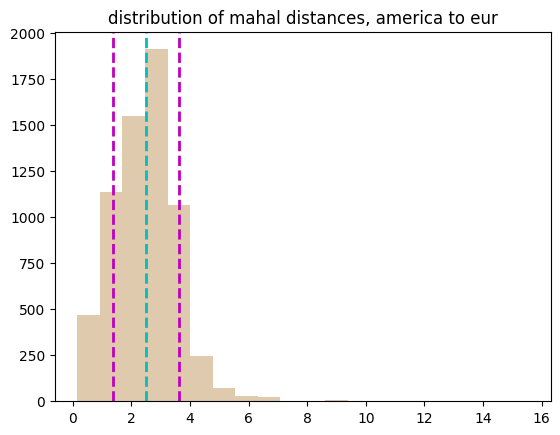

In [ ]:
mean = np.mean(shortest_distances_only)
std_dev = np.std(shortest_distances_only)

# Create histogram
plt.hist(shortest_distances_only, bins=20, alpha=0.7, color='tan')

# Mark the mean
plt.axvline(mean, color='c', linestyle='dashed', linewidth=2, label='Mean')

# Mark one standard deviation on either side of the mean
plt.axvline(mean + std_dev, color='m', linestyle='dashed', linewidth=2, label='+1 STD')
plt.axvline(mean - std_dev, color='m', linestyle='dashed', linewidth=2, label='-1 STD')
plt.title('distribution of mahal distances, america to eur')

Text(0.5, 1.0, 'distribution of mahal distances, eur to eur')

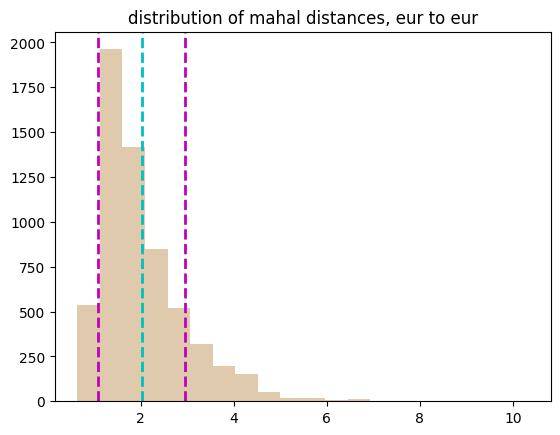

In [ ]:
mean = np.mean(mahal_distances_eur)
std_dev = np.std(mahal_distances_eur)
# z = 1.96
# upper_bound = mean + z * std_dev

plt.hist(mahal_distances_eur, bins=20, alpha=0.7, color='tan')

# Mark the mean
plt.axvline(mean, color='c', linestyle='dashed', linewidth=2, label='Mean')

# Mark one standard deviation on either side of the mean
plt.axvline(mean + std_dev, color='m', linestyle='dashed', linewidth=2, label='+1 STD')
plt.axvline(mean - std_dev, color='m', linestyle='dashed', linewidth=2, label='-1 STD')
# plt.axvline(upper_bound, color='k', linestyle='dashed', linewidth=2, label='-1 STD')
plt.title('distribution of mahal distances, eur to eur')

In [43]:
america_points['dist'] = shortest_distances_only

In [ ]:
mahal_distances_eur = mahal_distances_eur.reset_index(drop=True)

crta_coords_filtered['dist'] = mahal_distances_eur

(-14641852.624039328, -6841695.90415462, 2746944.401339209, 7307496.882081329)

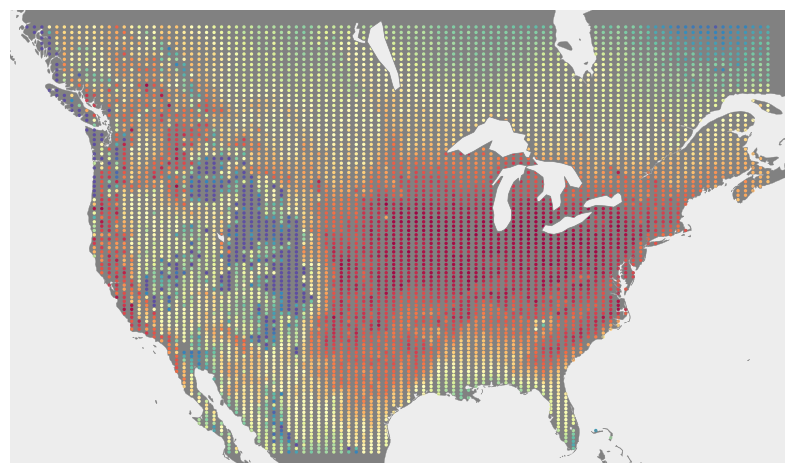

In [45]:
import geopandas as gpd
from shapely.geometry import Point
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from rasterio.warp import calculate_default_transform, reproject, Resampling
import matplotlib.pyplot as plt

extent = [-131.53, -61.46, 24.09, 54.90]

map_projection = ccrs.Mercator() 

great_lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='110m')

shapefile_path = 'data/shapefiles/ne_110m_land/ne_110m_land.shp'
gdf = gpd.read_file(shapefile_path)

lakes_shapefile_path = 'data/shapefiles/ne_110m_lakes/ne_110m_lakes.shp'
lakes_gdf = gpd.read_file(lakes_shapefile_path)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': map_projection})
ax.set_extent(extent, crs=ccrs.PlateCarree())  

ax.add_feature(cfeature.LAND, facecolor='#818181', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(great_lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')


ax.scatter(america_points['lon'], america_points['lat'], transform=ccrs.PlateCarree(), 
           c=america_points['dist'], cmap='Spectral', vmin=0, vmax = 2.5, s=2)

ax.axis('off')
